In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("C:/Users/neeli/Downloads/Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
df.shape

(157, 16)

In [5]:
df.drop_duplicates(keep ='last')
df.shape

(157, 16)

In [6]:
drop_cols = ['Vehicle_type']
df = df.drop(drop_cols, axis = 1)

In [7]:
len(df.columns)

15

In [8]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [20]:
df.describe(include=['object', 'bool'])

,Manufacturer,Model,Latest_Launch
count,157,157,157
unique,30,156,130
top,Dodge,Neon,1/29/2012
freq,11,2,2


In [9]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [10]:
def impute_mean(series):
    return series.fillna(series.mean())

In [13]:
df.__year_resale_value = df['__year_resale_value'].transform(impute_mean)
df.Price_in_thousands  = df['Price_in_thousands'].transform(impute_mean)
df.Engine_size  = df['Engine_size'].transform(impute_mean)
df.Horsepower  = df['Horsepower'].transform(impute_mean)
df.Wheelbase  = df['Wheelbase'].transform(impute_mean)
df.Width  = df['Width'].transform(impute_mean)
df.Length  = df['Length'].transform(impute_mean)
df.Curb_weight  = df['Curb_weight'].transform(impute_mean)
df.Fuel_capacity  = df['Fuel_capacity'].transform(impute_mean)
df.Fuel_efficiency  = df['Fuel_efficiency'].transform(impute_mean)
df.Power_perf_factor  = df['Power_perf_factor'].transform(impute_mean)

In [14]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [15]:
df_sort = df.sort_values(by = 'Fuel_efficiency', ascending = False)
df_sort.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
26,Chevrolet,Metro,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2012,23.276272
25,Chevrolet,Prizm,32.299,9.125,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9/11/2011,48.297636
136,Toyota,Corolla,142.535,10.025,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,4/11/2011,47.968972
130,Saturn,SC,24.546,10.590,12.535,1.9,100.0,102.4,66.4,180.0,2.367,12.1,33.0,3/16/2011,40.700072
129,Saturn,SL,80.620,9.200,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425


In [16]:
df.columns = df.columns.str.replace(' ', '_')

In [17]:
def max_min_val(col):
   
    first = df[col].idxmax()
    first_obs = pd.DataFrame(df.loc[first])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([first_obs, last_obs], axis=1)
    
    return min_max_obs

In [18]:
max_min_val('Sales_in_thousands')

,56,83
Manufacturer,Ford,Mitsubishi
Model,F-Series,3000GT
Sales_in_thousands,540.561,0.11
__year_resale_value,15.075,20.94
Price_in_thousands,26.935,25.45
Engine_size,4.6,3
Horsepower,220,161
Wheelbase,138.5,97.2
Width,79.1,72.4
Length,224.5,180.3


In [19]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.266436,-0.304413,0.019983,-0.197756,0.358179,0.140918,0.254979,0.008620,0.086540,-0.016747,-0.223017
__year_resale_value,-0.266436,1.000000,0.822395,0.468781,0.696888,-0.047803,0.159580,0.023867,0.297130,0.275026,-0.358137,0.743783
Price_in_thousands,-0.304413,0.822395,1.000000,0.626839,0.838450,0.110511,0.329109,0.156874,0.523753,0.423230,-0.491489,0.897945
Engine_size,0.019983,0.468781,0.626839,1.000000,0.837360,0.472130,0.690398,0.541424,0.754668,0.663022,-0.733920,0.818481
Horsepower,-0.197756,0.696888,0.838450,0.837360,1.000000,0.286308,0.539158,0.393364,0.605226,0.499907,-0.610648,0.991464
Wheelbase,0.358179,-0.047803,0.110511,0.472130,0.286308,1.000000,0.683135,0.839639,0.650211,0.654044,-0.497023,0.258847
Width,0.140918,0.159580,0.329109,0.690398,0.539158,0.683135,1.000000,0.710435,0.718010,0.656302,-0.599465,0.511982
Length,0.254979,0.023867,0.156874,0.541424,0.393364,0.839639,0.710435,1.000000,0.625055,0.563540,-0.443993,0.353956
Curb_weight,0.008620,0.297130,0.523753,0.754668,0.605226,0.650211,0.718010,0.625055,1.000000,0.863912,-0.817784,0.607312
Fuel_capacity,0.086540,0.275026,0.423230,0.663022,0.499907,0.654044,0.656302,0.563540,0.863912,1.000000,-0.801355,0.501123


In [21]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [24]:
df['Engine_size'].mean()

3.060897435897434

In [27]:
df[df['Engine_size'] == 2.5].mean()

Sales_in_thousands      58.092636
__year_resale_value     13.173539
Price_in_thousands      19.446818
Engine_size              2.500000
Horsepower             153.727273
Wheelbase              107.272727
Width                   69.081818
Length                 186.309091
Curb_weight              3.128364
Fuel_capacity           17.200000
Fuel_efficiency         23.181818
Power_perf_factor       62.525787
dtype: float64

In [30]:
df[df['Engine_size'] == 2.5]['Price_in_thousands'].mean()

19.446818181818184

In [31]:
df[(df['Engine_size'] <= 3.5) & (df['Manufacturer'] == 'BMW')]['Horsepower'].max()

193.0

In [55]:
df['Sales_in_thousands'].median()

29.45

In [56]:
df['Price_in_thousands'].median()

23.4

In [32]:
df.loc[3:8, 'Manufacturer':'Sales_in_thousands']

,Manufacturer,Model,Sales_in_thousands
3,Acura,RL,8.588
4,Audi,A4,20.397
5,Audi,A6,18.780
6,Audi,A8,1.380
7,BMW,323i,19.747
8,BMW,328i,9.231


In [34]:
df.iloc[2:10, 4:8]

,Price_in_thousands,Engine_size,Horsepower,Wheelbase
2,27.390755,3.2,225.0,106.9
3,42.000000,3.5,210.0,114.6
4,23.990000,1.8,150.0,102.6
5,33.950000,2.8,200.0,108.7
6,62.000000,4.2,310.0,113.0
7,26.990000,2.5,170.0,107.3
8,33.400000,2.8,193.0,107.3
9,38.900000,2.8,193.0,111.4


In [35]:
df[-5:]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,18.072975,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,18.072975,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,18.072975,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,18.072975,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,18.072975,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [36]:
df.apply(np.max) 

Manufacturer              Volvo
Model                    Xterra
Sales_in_thousands      540.561
__year_resale_value       67.55
Price_in_thousands         85.5
Engine_size                   8
Horsepower                  450
Wheelbase                 138.7
Width                      79.9
Length                    224.5
Curb_weight               5.572
Fuel_capacity                32
Fuel_efficiency              45
Latest_Launch          9/3/2011
Power_perf_factor       188.144
dtype: object

In [41]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [42]:
df[df['Model'].apply(lambda model: Model[0] == 'A')].head()

NameError: name 'Model' is not defined

(array([ 2., 27., 44., 43., 22., 10.,  7.,  1.,  0.,  1.]),
 array([ 55. ,  94.5, 134. , 173.5, 213. , 252.5, 292. , 331.5, 371. ,
        410.5, 450. ]),
 <a list of 10 Patch objects>)

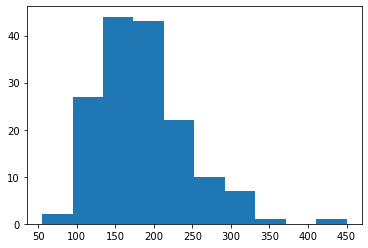

In [43]:
plt.hist(df['Horsepower'],10)

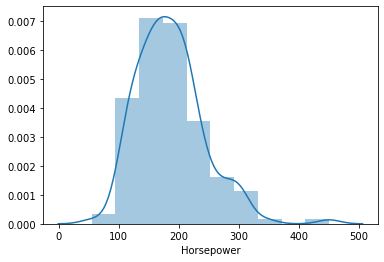

In [44]:
sns.distplot(df['Horsepower'],10)

In [45]:
make_dist = df.groupby('Manufacturer').size()
make_dist

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

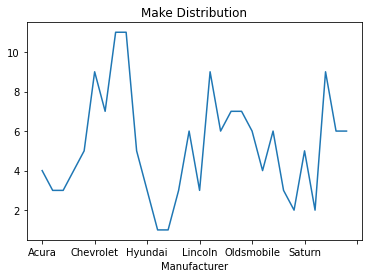

In [46]:
make_dist.plot(title = 'Make Distribution')

In [47]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head(9)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555000,33.950000,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,1.380,39.000000,62.000000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
7,19.747,18.072975,26.990000,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207
8,9.231,28.675000,33.400000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F1BE7D640>,
      dtype=object)

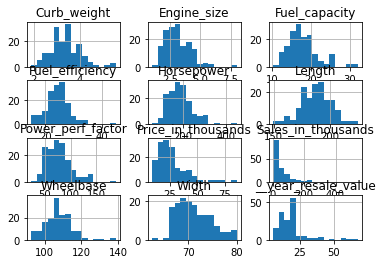

In [48]:
df_num.hist(bins=15)

In [49]:
df_corr = df_num.corr()['Price_in_thousands'][:-1]
df_corr

Sales_in_thousands    -0.304413
__year_resale_value    0.822395
Price_in_thousands     1.000000
Engine_size            0.626839
Horsepower             0.838450
Wheelbase              0.110511
Width                  0.329109
Length                 0.156874
Curb_weight            0.523753
Fuel_capacity          0.423230
Fuel_efficiency       -0.491489
Name: Price_in_thousands, dtype: float64

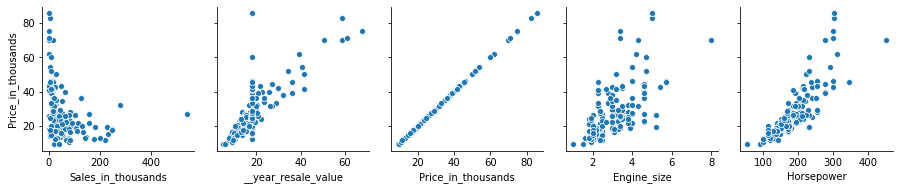

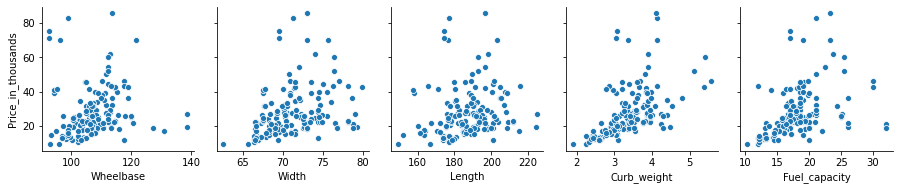

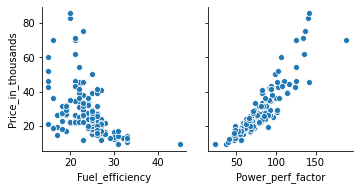

In [50]:
for i in range(0, len(df_num.columns),5):
    sns.pairplot(df_num, y_vars ='Price_in_thousands', x_vars = df_num.columns[i:i+5]  )

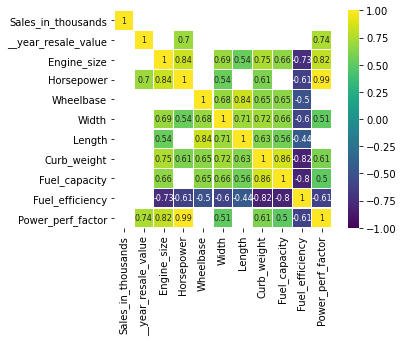

In [51]:
corr = df_num.drop('Price_in_thousands', axis =1).corr()
sns.heatmap(corr[(corr >= 0.5) |(corr <= -0.4)],
           cmap= 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
           annot = True, annot_kws={"size":8}, square =True);

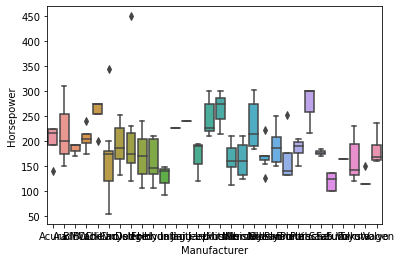

In [52]:
bp1 = sns.boxplot(x='Manufacturer', y='Horsepower', data = df )

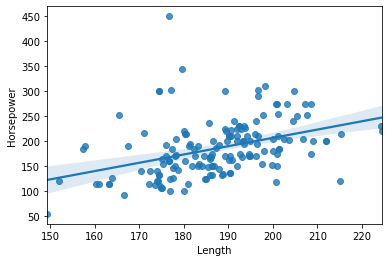

In [53]:
sns.regplot(df['Length'],df['Horsepower'])

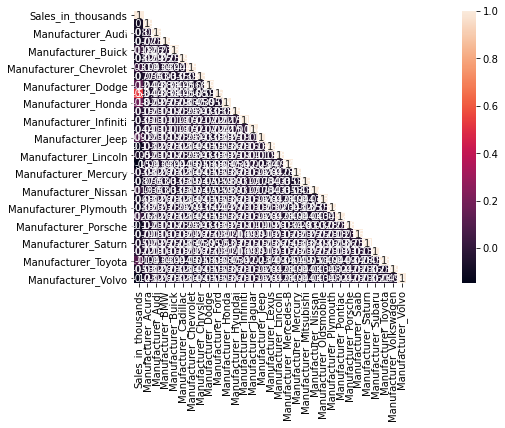

In [54]:
df1 = df[['Manufacturer','Sales_in_thousands']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);